In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn import ensemble

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# Чтение CSV файла в DataFrame
df = pd.read_csv('Fraud.csv')

In [3]:
display(df)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
151794,12,PAYMENT,21278.77,C1003833784,728718.50,707439.73,M2001277538,0.0,0.0,0.0,0.0
151795,12,PAYMENT,7131.13,C988075754,707439.73,700308.60,M1419191344,0.0,0.0,0.0,0.0
151796,12,PAYMENT,2870.84,C1159606163,700308.60,697437.75,M2054942544,0.0,0.0,0.0,0.0
151797,12,PAYMENT,17873.00,C1714697587,697437.75,679564.76,M200223521,0.0,0.0,0.0,0.0


In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151798 entries, 0 to 151797
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            151798 non-null  int64  
 1   type            151798 non-null  object 
 2   amount          151798 non-null  float64
 3   nameOrig        151798 non-null  object 
 4   oldbalanceOrg   151798 non-null  float64
 5   newbalanceOrig  151798 non-null  float64
 6   nameDest        151798 non-null  object 
 7   oldbalanceDest  151798 non-null  float64
 8   newbalanceDest  151798 non-null  float64
 9   isFraud         151798 non-null  float64
 10  isFlaggedFraud  151798 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 13.9+ MB


In [6]:
round(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest',]].describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
step,151798.0,9.334,1.906,1.00,9.000,10.000,11.000,12.00
amount,151798.0,179178.570,340161.394,0.32,11114.068,61230.695,223042.902,10000000.00
oldbalanceOrg,151798.0,887916.723,2807539.725,0.00,0.000,19990.500,195668.765,38939424.03
newbalanceOrig,151798.0,904340.197,2844267.505,0.00,0.000,0.000,226271.855,38946233.02
oldbalanceDest,151798.0,913764.098,2384388.567,0.00,0.000,31644.000,686905.913,34905522.40
newbalanceDest,151798.0,1180076.119,2705635.141,0.00,0.000,93329.770,1120988.540,38946233.02


Доля мошеннических транзакций: 0.0008629889721867218


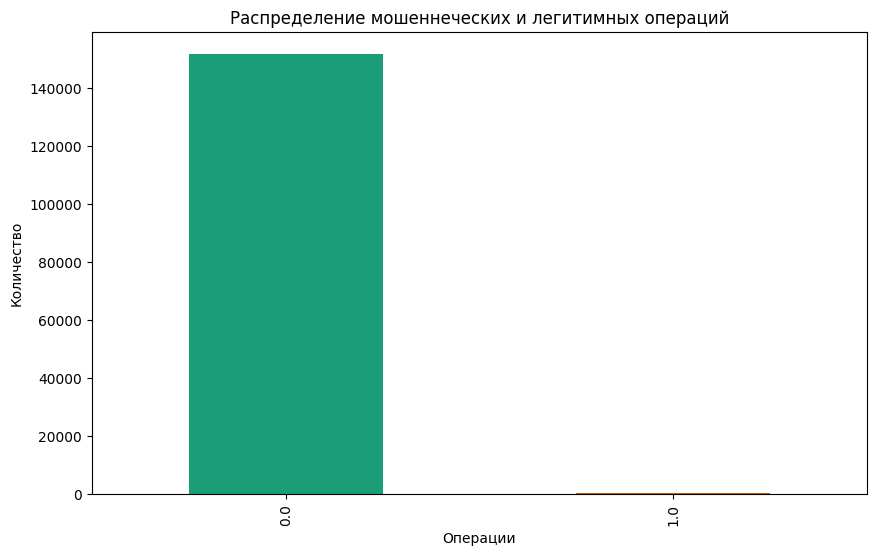

In [7]:
# Доля мошеннеческих операций
print('Доля мошеннических транзакций:', df['isFraud'].mean())

# Количество мошеннических и легетимных операций
plt.figure(figsize=(10, 6))
df['isFraud'].value_counts().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Распределение мошеннеческих и легитимных операций')
plt.xlabel('Операции')
plt.ylabel('Количество')
plt.show()

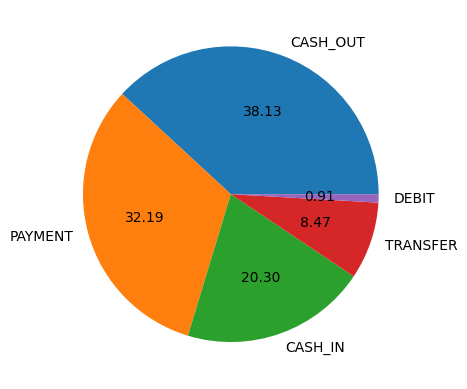

In [8]:
# Количество операций по типам
plt.pie(x = df['type'].value_counts(), autopct = '%.2f', labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.show()


In [9]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,151667
1.0,131


                df      sum_sq   mean_sq          F        PR(>F)
C(type)        4.0    0.304873  0.076218  88.598649  2.419808e-75
Residual  151793.0  130.582075  0.000860        NaN           NaN


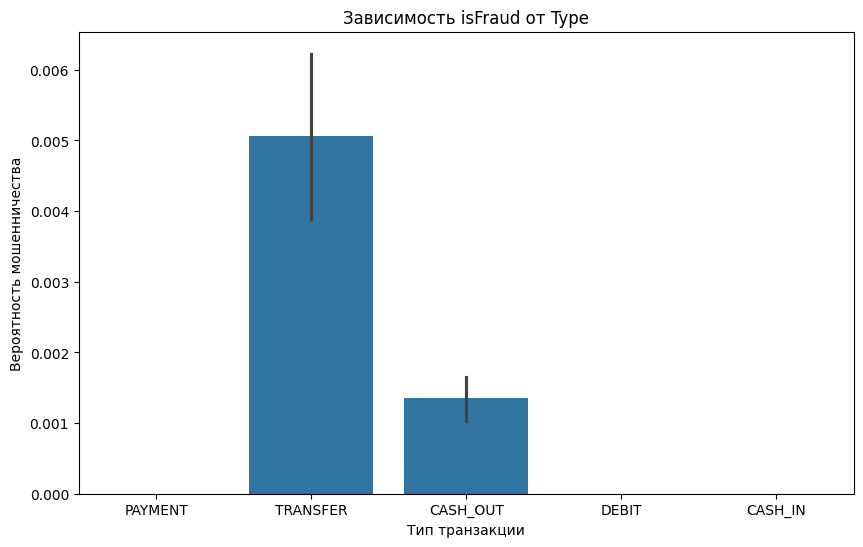

In [10]:
# Анализ зависимости между Type и isFraud
model = ols('isFraud ~ C(type)', data=df).fit()
anova_results = anova_lm(model)
print(anova_results)

# Визуализация зависимости
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='isFraud', data=df)
plt.title('Зависимость isFraud от Type')
plt.xlabel('Тип транзакции')
plt.ylabel('Вероятность мошенничества')
plt.show()

In [11]:
df['type'].value_counts()

,count
type,
PAYMENT,57888
CASH_OUT,48858
CASH_IN,30820
TRANSFER,12851
DEBIT,1381


**Как видим, все мошеннические операции связаны только с переводами и снятием наличных**

In [12]:
df.loc[(df['type'] == 'CASH_OUT') & (df['isFraud'] == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1.0,0.0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1.0,0.0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1.0,0.0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1.0,0.0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
136420,11,CASH_OUT,2100.00,C169099320,2100.00,0.0,C697156329,112512.48,114612.48,1.0,0.0
141635,11,CASH_OUT,313418.28,C2021456831,313418.28,0.0,C157591472,688164.64,1029922.17,1.0,0.0
142088,11,CASH_OUT,12461.00,C938980312,12461.00,0.0,C621014131,27964.11,40425.11,1.0,0.0
146628,12,CASH_OUT,19472.00,C1205151454,19472.00,0.0,C664770316,0.00,19472.00,1.0,0.0


In [13]:
df.loc[(df['type'] == 'TRANSFER') & (df['isFraud'] == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1.0,0.0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1.0,0.0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1.0,0.0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.00,0.00,1.0,0.0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.00,0.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
138559,11,TRANSFER,1933920.80,C1706582969,0.00,0.0,C461905695,1283762.85,3217683.65,1.0,0.0
141634,11,TRANSFER,313418.28,C711446907,313418.28,0.0,C888769567,0.00,97980.88,1.0,0.0
142087,11,TRANSFER,12461.00,C2079232448,12461.00,0.0,C585834595,0.00,0.00,1.0,0.0
146627,12,TRANSFER,19472.00,C1101705841,19472.00,0.0,C925285469,0.00,0.00,1.0,0.0


In [14]:
df['nameOrig'].value_counts()

,count
nameOrig,
C260230637,2
C44568807,2
C1709295811,2
C1231006815,1
C1951441730,1
...,...
C81967001,1
C257455526,1
C1825075464,1


**Каждое значение в столбце nameOrig уникально**

In [15]:
df['nameDest'].value_counts()

,count
nameDest,
C985934102,80
C1286084959,79
C1590550415,74
C248609774,74
C2083562754,71
...,...
M514938024,1
M170862654,1
M1156516337,1


<Figure size 800x600 with 0 Axes>

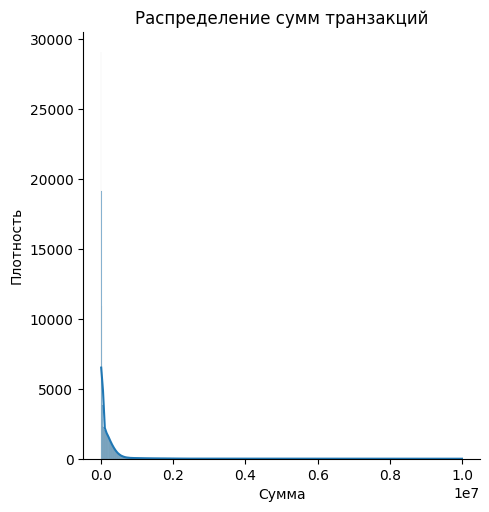

In [16]:
plt.figure(figsize=(8, 6))
sns.displot(df['amount'], kde=True)
plt.title('Распределение сумм транзакций')
plt.xlabel('Сумма')
plt.ylabel('Плотность')
plt.show()

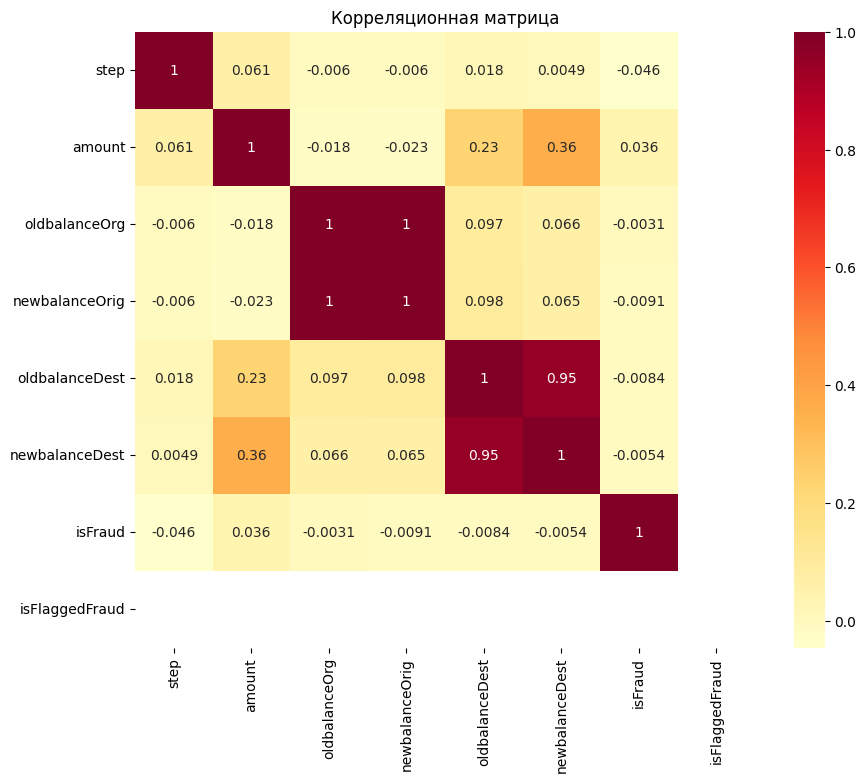

In [17]:
# Корреляционный анализ
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица')
plt.show()

**Среди численных данных наибольшая зависимость типа операции по критерию мошенничества (isFraud) наблюдается от суммы операции (amount)**


In [18]:
df=df.drop({'nameOrig','nameDest'},axis=1)

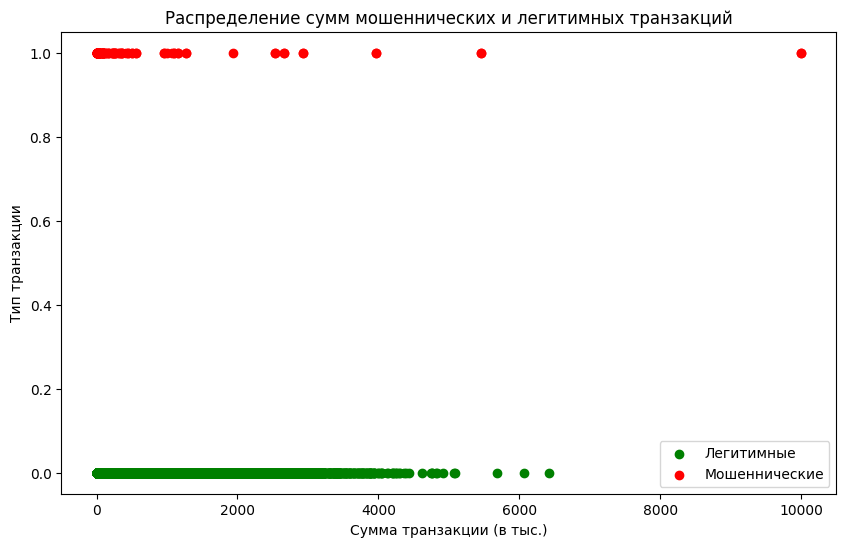

In [19]:
plt.figure(figsize=(10, 6))
df_legit = df[df['isFraud'] == 0]
df_fraud = df[df['isFraud'] == 1]
plt.scatter(df_legit['amount'] / 1000, df_legit['isFraud'], c='green', label='Легитимные')
plt.scatter(df_fraud['amount'] / 1000, df_fraud['isFraud'], c='red', label='Мошеннические')
plt.xlabel('Сумма транзакции (в тыс.)')
plt.ylabel('Тип транзакции')
plt.title('Распределение сумм мошеннических и легитимных транзакций')
plt.legend()

In [20]:
df=df.drop({'newbalanceDest','newbalanceOrig'},axis=1)
display(df)

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,0.0,0.0,0.0
1,1,PAYMENT,1864.28,21249.00,0.0,0.0,0.0
2,1,TRANSFER,181.00,181.00,0.0,1.0,0.0
3,1,CASH_OUT,181.00,181.00,21182.0,1.0,0.0
4,1,PAYMENT,11668.14,41554.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
151793,12,PAYMENT,6266.61,734985.11,0.0,0.0,0.0
151794,12,PAYMENT,21278.77,728718.50,0.0,0.0,0.0
151795,12,PAYMENT,7131.13,707439.73,0.0,0.0,0.0
151796,12,PAYMENT,2870.84,700308.60,0.0,0.0,0.0


In [21]:
column_names = ['type']
for i in column_names:
  df[i] = pd.factorize(df[i])[0]

In [22]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,170136.0,0.0,0.0,0.0
1,1,0,1864.28,21249.0,0.0,0.0,0.0
2,1,1,181.00,181.0,0.0,1.0,0.0
3,1,2,181.00,181.0,21182.0,1.0,0.0
4,1,0,11668.14,41554.0,0.0,0.0,0.0


<Axes: >

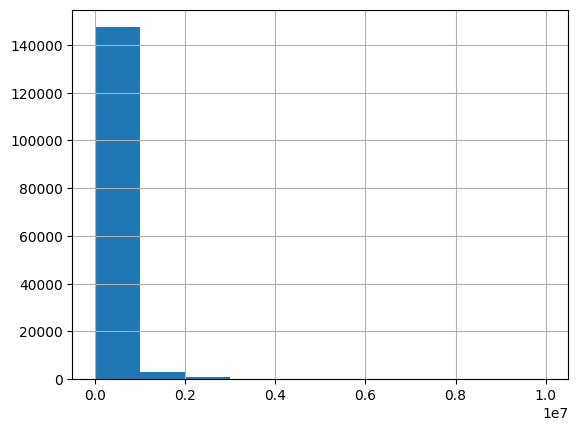

In [23]:
df['amount'].hist()

In [24]:
fraud = df[df['isFraud'] == 1]
safe = df[df['isFraud'] == 0]

(150076, 7)


<Axes: >

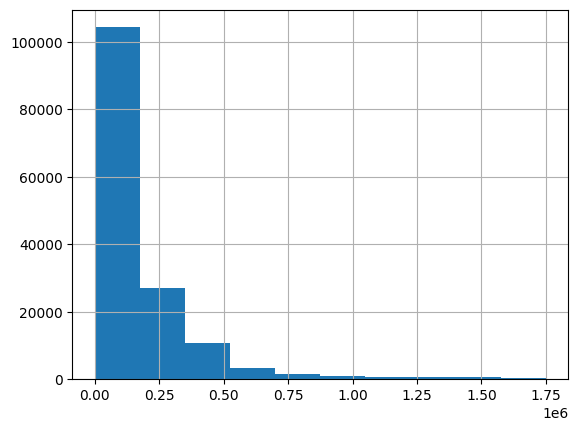

In [25]:
df = df[df['amount'] < 1.75e6] # оставим только те строки, где значение цены меньше 8 000 000
print(df.shape) # выведем размер отфильтрованного дата сета (кол-во строк, кол-во столбцов), как видим, количество строк сократится
df['amount'].hist() # построим диаграмму

In [26]:
print(safe.shape)
print(fraud.shape)

(151667, 7)
(131, 7)


In [27]:
safe=safe.sample(n=131)

In [28]:
print(safe.shape)
print(fraud.shape)

(131, 7)
(131, 7)


In [29]:
up_df=pd.concat([safe,fraud], axis=0)

In [30]:
up_df.shape

(262, 7)

In [31]:
y = up_df['isFraud']
X = up_df.drop(['isFraud'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [32]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(209, 6) (53, 6) (209,) (53,)


In [33]:
y_test.value_counts()

,count
isFraud,
0.0,27
1.0,26


In [34]:
y_train.value_counts()

,count
isFraud,
1.0,105
0.0,104


In [57]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [58]:
model_metrics = []

In [59]:
rf_model = ensemble.RandomForestClassifier(n_estimators=150)
rf_model.fit(X_train_scaled, y_train)
test_predict_rf = rf_model.predict(X_test_scaled)
print(accuracy_score(y_test, test_predict_rf))
print(recall_score(y_test, test_predict_rf))
print(precision_score(y_test, test_predict_rf))
print(f1_score(y_test, test_predict_rf))

Accuracy = accuracy_score(y_test, test_predict_rf),
Precision = precision_score(y_test, test_predict_rf),
Recall = recall_score(y_test, test_predict_rf),
F1 = f1_score(y_test, test_predict_rf)

model_metrics.append({
        'Model': "Random Forest",
        'Accuracy': Accuracy,
        'Precision': Precision,
        'Recall': Recall,
        'F1-score': F1
    })

0.8867924528301887
0.9230769230769231
0.8571428571428571
0.888888888888889


In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
test_predict = model.predict(X_test_scaled)
print(accuracy_score(y_test, test_predict))
print(recall_score(y_test, test_predict))
print(precision_score(y_test, test_predict))
print(f1_score(y_test, test_predict))

Accuracy2 = accuracy_score(y_test, test_predict),
Precision2 = precision_score(y_test, test_predict),
Recall2 = recall_score(y_test, test_predict),
F12 = f1_score(y_test, test_predict)

model_metrics.append({
        'Model': "Logistic Regression",
        'Accuracy': Accuracy2,
        'Precision': Precision2,
        'Recall': Recall2,
        'F1-score': F12
    })

0.7358490566037735
0.7692307692307693
0.7142857142857143
0.7407407407407408


In [61]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
test_pred = model.predict(X_test_scaled)

print(accuracy_score(y_test, test_pred))
print(recall_score(y_test, test_pred))
print(precision_score(y_test, test_pred))
print(f1_score(y_test, test_pred))

Accuracy3 = accuracy_score(y_test, test_pred),
Precision3 = precision_score(y_test, test_pred),
Recall3 = recall_score(y_test, test_pred),
F13 = f1_score(y_test, test_pred)

model_metrics.append({
        'Model': "Decision Tree",
        'Accuracy': Accuracy3,
        'Precision': Precision3,
        'Recall': Recall3,
        'F1-score': F13
    })

0.9056603773584906
0.9615384615384616
0.8620689655172413
0.9090909090909091


Гауссовский наивный байесовский классификатор:


In [63]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train_scaled, y_train)

y_pred = gaussian.predict(X_test_scaled)

print(accuracy_score(y_test, test_pred))
print(recall_score(y_test, test_pred))
print(precision_score(y_test, test_pred))
print(f1_score(y_test, test_pred))

Accuracy4 = accuracy_score(y_test, test_pred),
Precision4 = precision_score(y_test, test_pred),
Recall4 = recall_score(y_test, test_pred),
F14 = f1_score(y_test, test_pred)

model_metrics.append({
        'Model': "GaussianNB",
        'Accuracy': Accuracy4,
        'Precision': Precision4,
        'Recall': Recall4,
        'F1-score': F14
    })

0.9056603773584906
0.9615384615384616
0.8620689655172413
0.9090909090909091


Бернуллиевский наивный байесовский классификатор:



In [64]:
from sklearn.naive_bayes import BernoulliNB

bernoulli = BernoulliNB()
bernoulli.fit(X_train_scaled, y_train)
y_pred = bernoulli.predict(X_test_scaled)

print(accuracy_score(y_test, test_pred))
print(recall_score(y_test, test_pred))
print(precision_score(y_test, test_pred))
print(f1_score(y_test, test_pred))

Accuracy5 = accuracy_score(y_test, test_pred),
Precision5 = precision_score(y_test, test_pred),
Recall5 = recall_score(y_test, test_pred),
F15 = f1_score(y_test, test_pred)

model_metrics.append({
        'Model': "BernoulliNB",
        'Accuracy': Accuracy5,
        'Precision': Precision5,
        'Recall': Recall5,
        'F1-score': F15
    })

0.9056603773584906
0.9615384615384616
0.8620689655172413
0.9090909090909091


In [65]:
metrics_df = pd.DataFrame(model_metrics)
display(metrics_df)

,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest,"(0.8867924528301887,)","(0.8571428571428571,)","(0.9230769230769231,)",0.888889
1,Logistic Regression,"(0.7358490566037735,)","(0.7142857142857143,)","(0.7692307692307693,)",0.740741
2,Decision Tree,"(0.9056603773584906,)","(0.8620689655172413,)","(0.9615384615384616,)",0.909091
3,GaussianNB,"(0.9056603773584906,)","(0.8620689655172413,)","(0.9615384615384616,)",0.909091
4,BernoulliNB,"(0.9056603773584906,)","(0.8620689655172413,)","(0.9615384615384616,)",0.909091
